In [1]:
import keras.datasets.mnist as mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.models import Sequential
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [2]:
# importing the dataset :D
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

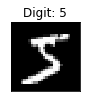

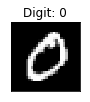

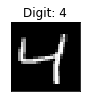

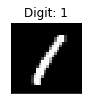

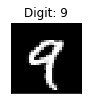

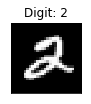

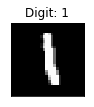

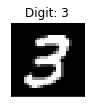

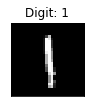

In [3]:
plt.figure()
for i in range(9): 
    plt.subplot(3,3,i+1) 
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none') 
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([]) 
    plt.show()



In [4]:
# putting data into 784 because : 28X28
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

In [5]:
# Normalizing the Data
X_train /= 255
X_test /= 255

print('X Train : {}'.format(X_train.shape))
print('X Test : {}'.format(X_test.shape))

X Train : (60000, 784)
X Test : (10000, 784)


In [6]:
# One hot encode the outputs 
number_of_digits = 10
Y_train = np_utils.to_categorical(y_train, number_of_digits)
Y_test = np_utils.to_categorical(y_test, number_of_digits)
print('Shape After hot encode : {}'.format(Y_train.shape))

Shape After hot encode : (60000, 10)


In [7]:
# Creating Kera's Layers
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [8]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=2, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 28s - loss: 0.2546 - acc: 0.9225 - val_loss: 0.1110 - val_acc: 0.9650
Epoch 2/20
 - 24s - loss: 0.1016 - acc: 0.9690 - val_loss: 0.0744 - val_acc: 0.9769
Epoch 3/20
 - 22s - loss: 0.0714 - acc: 0.9780 - val_loss: 0.0773 - val_acc: 0.9759
Epoch 4/20
 - 22s - loss: 0.0552 - acc: 0.9818 - val_loss: 0.0770 - val_acc: 0.9762
Epoch 5/20
 - 20s - loss: 0.0453 - acc: 0.9851 - val_loss: 0.0614 - val_acc: 0.9808
Epoch 6/20
 - 17s - loss: 0.0384 - acc: 0.9878 - val_loss: 0.0658 - val_acc: 0.9800
Epoch 7/20
 - 21s - loss: 0.0323 - acc: 0.9891 - val_loss: 0.0641 - val_acc: 0.9801
Epoch 8/20
 - 19s - loss: 0.0298 - acc: 0.9904 - val_loss: 0.0639 - val_acc: 0.9824
Epoch 9/20
 - 23s - loss: 0.0278 - acc: 0.9911 - val_loss: 0.0663 - val_acc: 0.9815
Epoch 10/20
 - 18s - loss: 0.0232 - acc: 0.9922 - val_loss: 0.0670 - val_acc: 0.9823
Epoch 11/20
 - 17s - loss: 0.0235 - acc: 0.9920 - val_loss: 0.0666 - val_acc: 0.9830
Epoch 12/20
 - 17s - los

In [11]:
# Saving the model
model.save(os.path.join(os.getcwd(), 'model.h5'))